<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/J_Clust_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic:** Julia

**Title:** KMeans

**Author:** Luiz Barboza

**Date:** 20/dec/24

**Lang:** R

**Site:** https://quant-research.group/

**Email:** contato@quant-research.group

In [ ]:
versioninfo()

Julia Version 1.10.8
Commit 4c16ff44be8 (2025-01-22 10:06 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


These Julia packages are for data manipulation, analysis, and visualization:

* **CSV:** Reads and writes data in CSV (Comma Separated Values) format, a common way to store tabular data.
* **DataFrames:** Provides a powerful data structure (DataFrames) for working with tabular data, similar to spreadsheets or SQL tables. It allows for efficient data manipulation, filtering, and transformation.
* **Statistics:** Offers functions for statistical calculations, such as mean, median, standard deviation, and more. It's used for analyzing and summarizing data.
* **StatsPlots:** Extends the Plots.jl library with statistical plotting functions. It enables the creation of visualizations specifically designed for statistical analysis, like histograms, box plots, scatter plots with regression lines, etc.


In [ ]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
using CSV
using DataFrames
using Statistics
using StatsPlots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [10745b16] + Statistics v1.10.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed MultivariateStats ─ v0.10.3
   Installed Arpack_jll ──────── v3.5.1+1
   Installed StatsPlots ──────── v0.15.7
   Installed Widgets ─────────── v0.6.7
   Installed TableOperations ─── v1.2.0
   Installed Distances ───────── v0.10.12
   Installed NearestNeighbors ── v0.4.21
   Installed Clustering ──────── v0.15.8
   Installed Arpack ──────────── v0.5.4
    Updating `~/.julia/environments/v1.10/Project.to

Let's load Health and insurance claim data: age, gender, BMI, blood pressure, diabetic status, children, smoker, and claim amount.

In [ ]:
;wget https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/demographics.csv

--2025-03-15 00:54:15--  https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/demographics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52302 (51K) [text/plain]
Saving to: ‘demographics.csv’

     0K .......... .......... .......... .......... .......... 97% 3.28M 0s
    50K .                                                     100% 2.00T=0.01s

2025-03-15 00:54:16 (3.35 MB/s) - ‘demographics.csv’ saved [52302/52302]



In [ ]:
df=CSV.read("demographics.csv", DataFrame)
first(df,5)

Row,age,is_male,bmi,bloodpressure,diabetic,children,smoker,claim
,Int64,Bool,Float64,Int64,Bool,Int64,Bool,Float64
1,39,true,23.2,91,true,0,false,1121.87
2,24,true,30.1,87,false,0,false,1131.51
3,19,true,41.1,100,false,0,false,1146.8
4,20,true,43.0,86,false,0,false,1149.4
5,30,true,53.1,97,false,0,false,1163.46


Let's load the lib that Adds clustering algorithms to Julia.

In [ ]:
Pkg.add("Clustering")
using Clustering

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [aaaa29a8] + Clustering v0.15.8
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Let's Plot BMI vs. claim amount in a scatter plot.

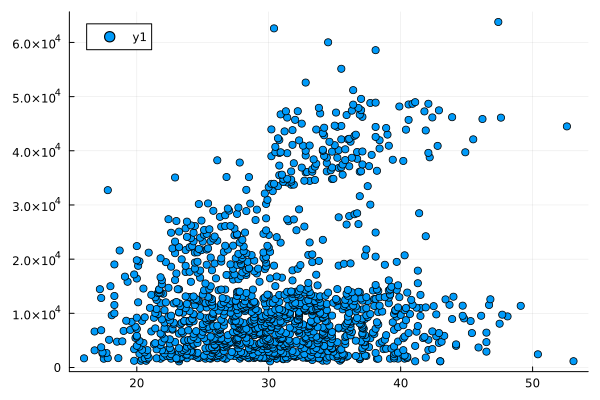

In [ ]:
scatter(df.bmi,df.claim)

Let's Perform k-means clustering on the dataset, assigning each data point to one of 3 clusters.

In [ ]:
pred_train = kmeans(Matrix(df)', 3).assignments

1332-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

Let's create a Scatter plot of BMI vs. claim, colored by k-means cluster assignments.

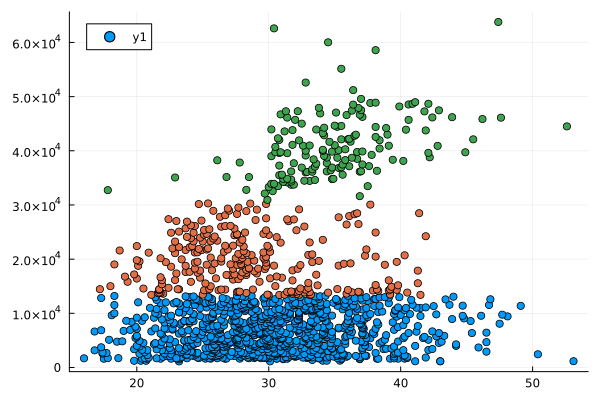

In [ ]:
scatter(df.bmi,df.claim,color=pred_train)